In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
income_df=pd.read_csv('/home/akash/Desktop/DATASET/adult.csv')
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
income_df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [8]:
income_df.dtypes

age                float64
workclass           object
fnlwgt               int64
education           object
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [9]:
my_df = income_df.dropna()

In [10]:
my_df['predclass'] = my_df['income']
del my_df['income']
my_df['education-num'] = my_df['educational-num']
del my_df['educational-num']

In [11]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null float64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null float64
native-country    48842 non-null object
predclass         48842 non-null object
education-num     48842 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ MB


In [12]:
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
education-num     0
dtype: int64

In [13]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital-status',my_df['marital-status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('gender',my_df.gender.unique())
print('native-country',my_df['native-country'].unique())
print('predclass',my_df.predclass.unique())


workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

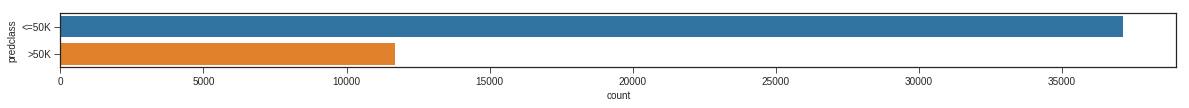

In [14]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

In [15]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [16]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.238900
0,Bachelors,13.000000
1,CommunityCollege,10.361967
3,HighGrad,9.000000
5,dropout,5.614544


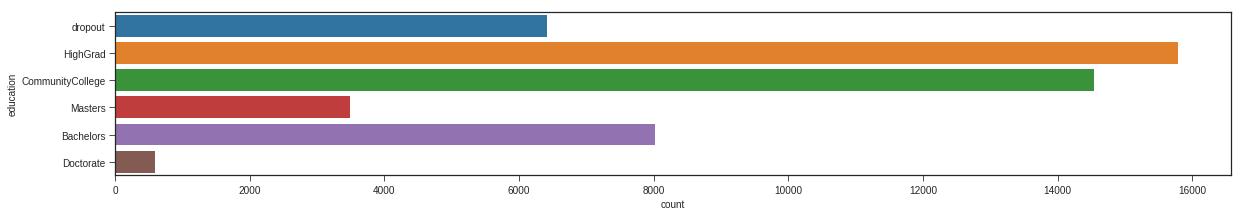

In [17]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)

In [18]:
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

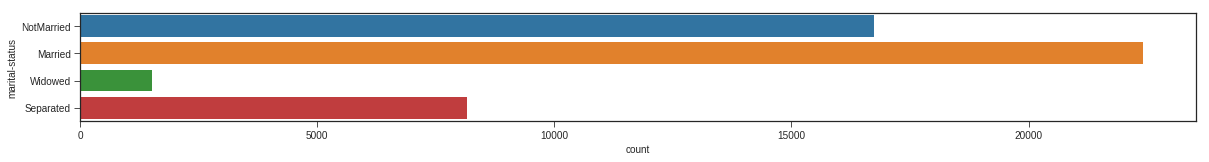

In [19]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df)

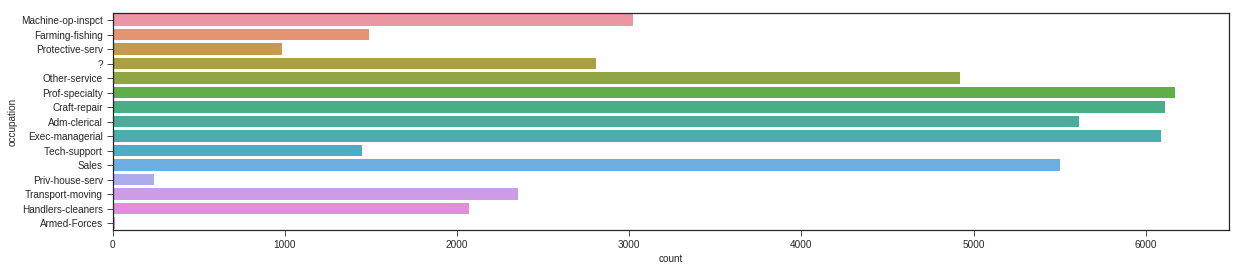

In [20]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

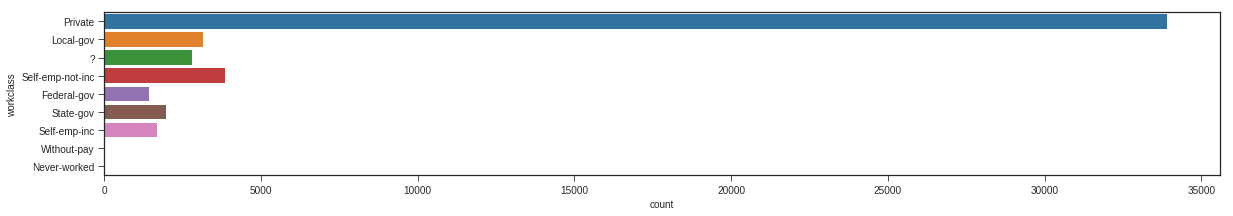

In [21]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

In [22]:
my_df['age_bin'] = pd.cut(my_df['age'], 20)

In [23]:
my_df['age_bin']

0          (24.3, 27.95]
1          (35.25, 38.9]
2          (27.95, 31.6]
3          (42.55, 46.2]
4        (16.927, 20.65]
5          (31.6, 35.25]
6          (27.95, 31.6]
7          (60.8, 64.45]
8          (20.65, 24.3]
9          (53.5, 57.15]
10         (64.45, 68.1]
11         (35.25, 38.9]
12         (24.3, 27.95]
13         (57.15, 60.8]
14         (46.2, 49.85]
15         (42.55, 46.2]
16       (16.927, 20.65]
17         (42.55, 46.2]
18         (35.25, 38.9]
19         (38.9, 42.55]
20         (31.6, 35.25]
21         (31.6, 35.25]
22         (71.75, 75.4]
23         (24.3, 27.95]
24         (24.3, 27.95]
25         (42.55, 46.2]
26         (20.65, 24.3]
27         (20.65, 24.3]
28         (53.5, 57.15]
29         (31.6, 35.25]
              ...       
48812      (27.95, 31.6]
48813      (31.6, 35.25]
48814      (53.5, 57.15]
48815      (35.25, 38.9]
48816      (20.65, 24.3]
48817      (31.6, 35.25]
48818      (27.95, 31.6]
48819      (35.25, 38.9]
48820      (68.1, 71.75]


/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


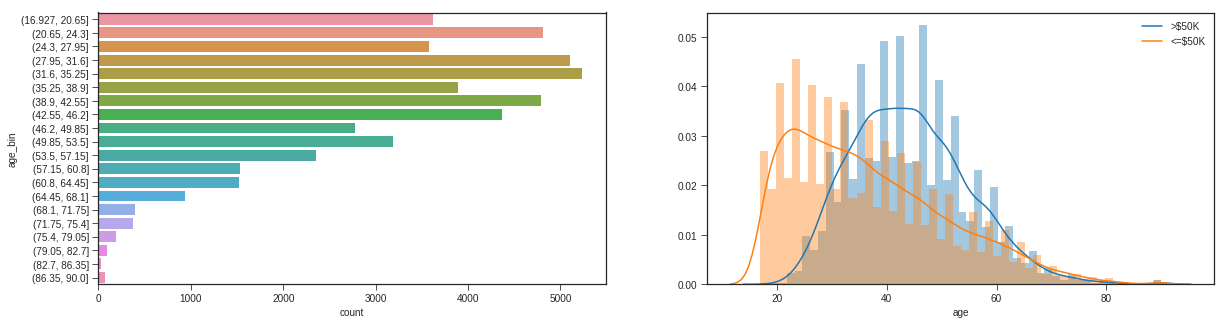

In [24]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [25]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,44.275178
0,<=50K,36.872184


<Figure size 1440x360 with 0 Axes>

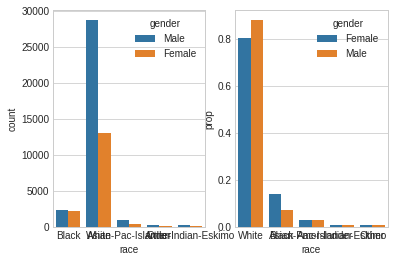

In [26]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [27]:
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(20, 60)

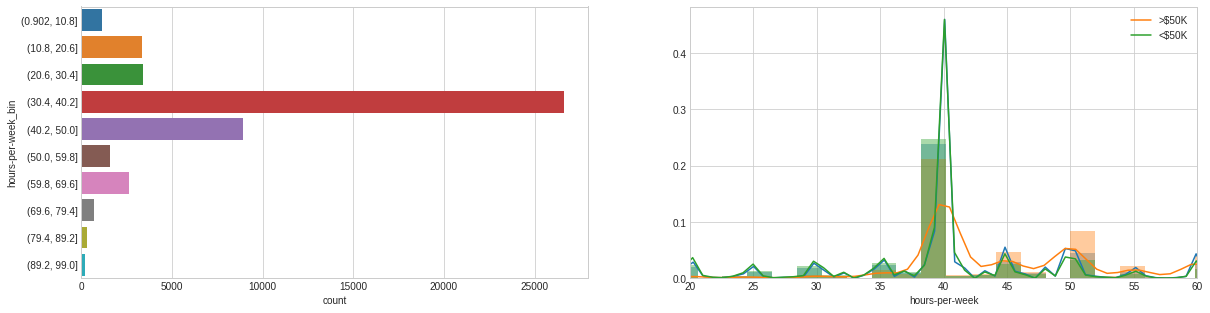

In [28]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


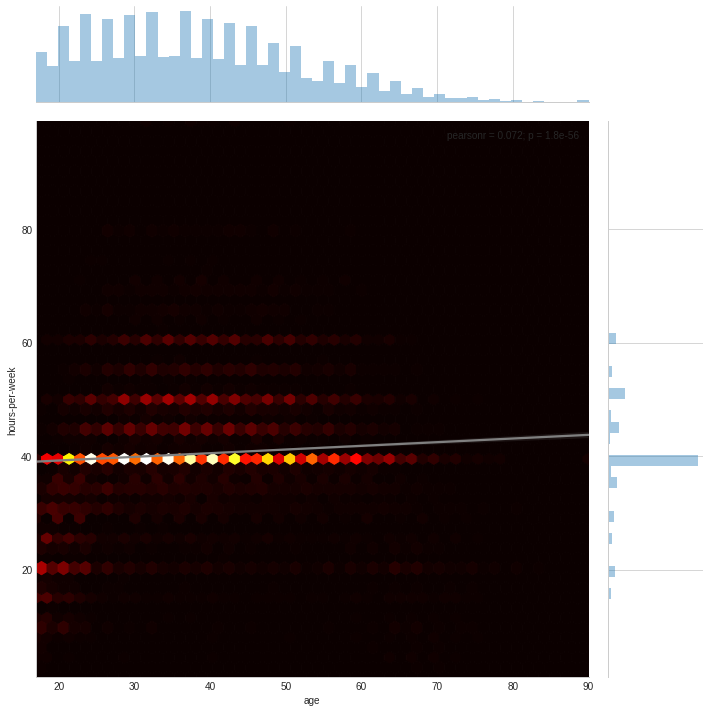

In [29]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = my_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(my_df.age, my_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

In [30]:
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin
0,25.0,Private,226802,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K,7,"(24.3, 27.95]","(30.4, 40.2]"
1,38.0,Private,89814,HighGrad,Married,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K,9,"(35.25, 38.9]","(40.2, 50.0]"
2,28.0,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K,12,"(27.95, 31.6]","(30.4, 40.2]"
3,44.0,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K,10,"(42.55, 46.2]","(30.4, 40.2]"
4,18.0,?,103497,CommunityCollege,NotMarried,?,Own-child,White,Female,0,0,30.0,United-States,<=50K,10,"(16.927, 20.65]","(20.6, 30.4]"


In [31]:
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

In [32]:
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,25.0,Private,226802,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K,7,"(24.3, 27.95]","(30.4, 40.2]",1000.0,"(909.9, 1798.8]"
1,38.0,Private,89814,HighGrad,Married,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K,9,"(35.25, 38.9]","(40.2, 50.0]",1900.0,"(1798.8, 2687.7]"
2,28.0,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K,12,"(27.95, 31.6]","(30.4, 40.2]",1120.0,"(909.9, 1798.8]"
3,44.0,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K,10,"(42.55, 46.2]","(30.4, 40.2]",1760.0,"(909.9, 1798.8]"
4,18.0,?,103497,CommunityCollege,NotMarried,?,Own-child,White,Female,0,0,30.0,United-States,<=50K,10,"(16.927, 20.65]","(20.6, 30.4]",540.0,"(12.111, 909.9]"


/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


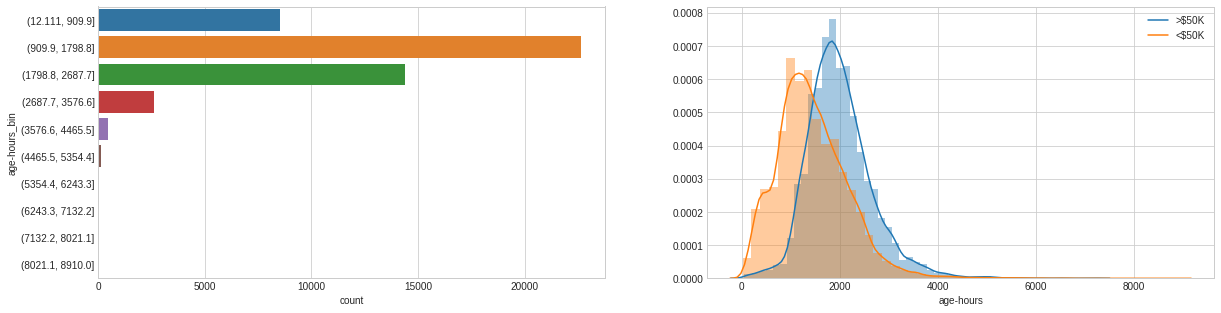

In [33]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['predclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})


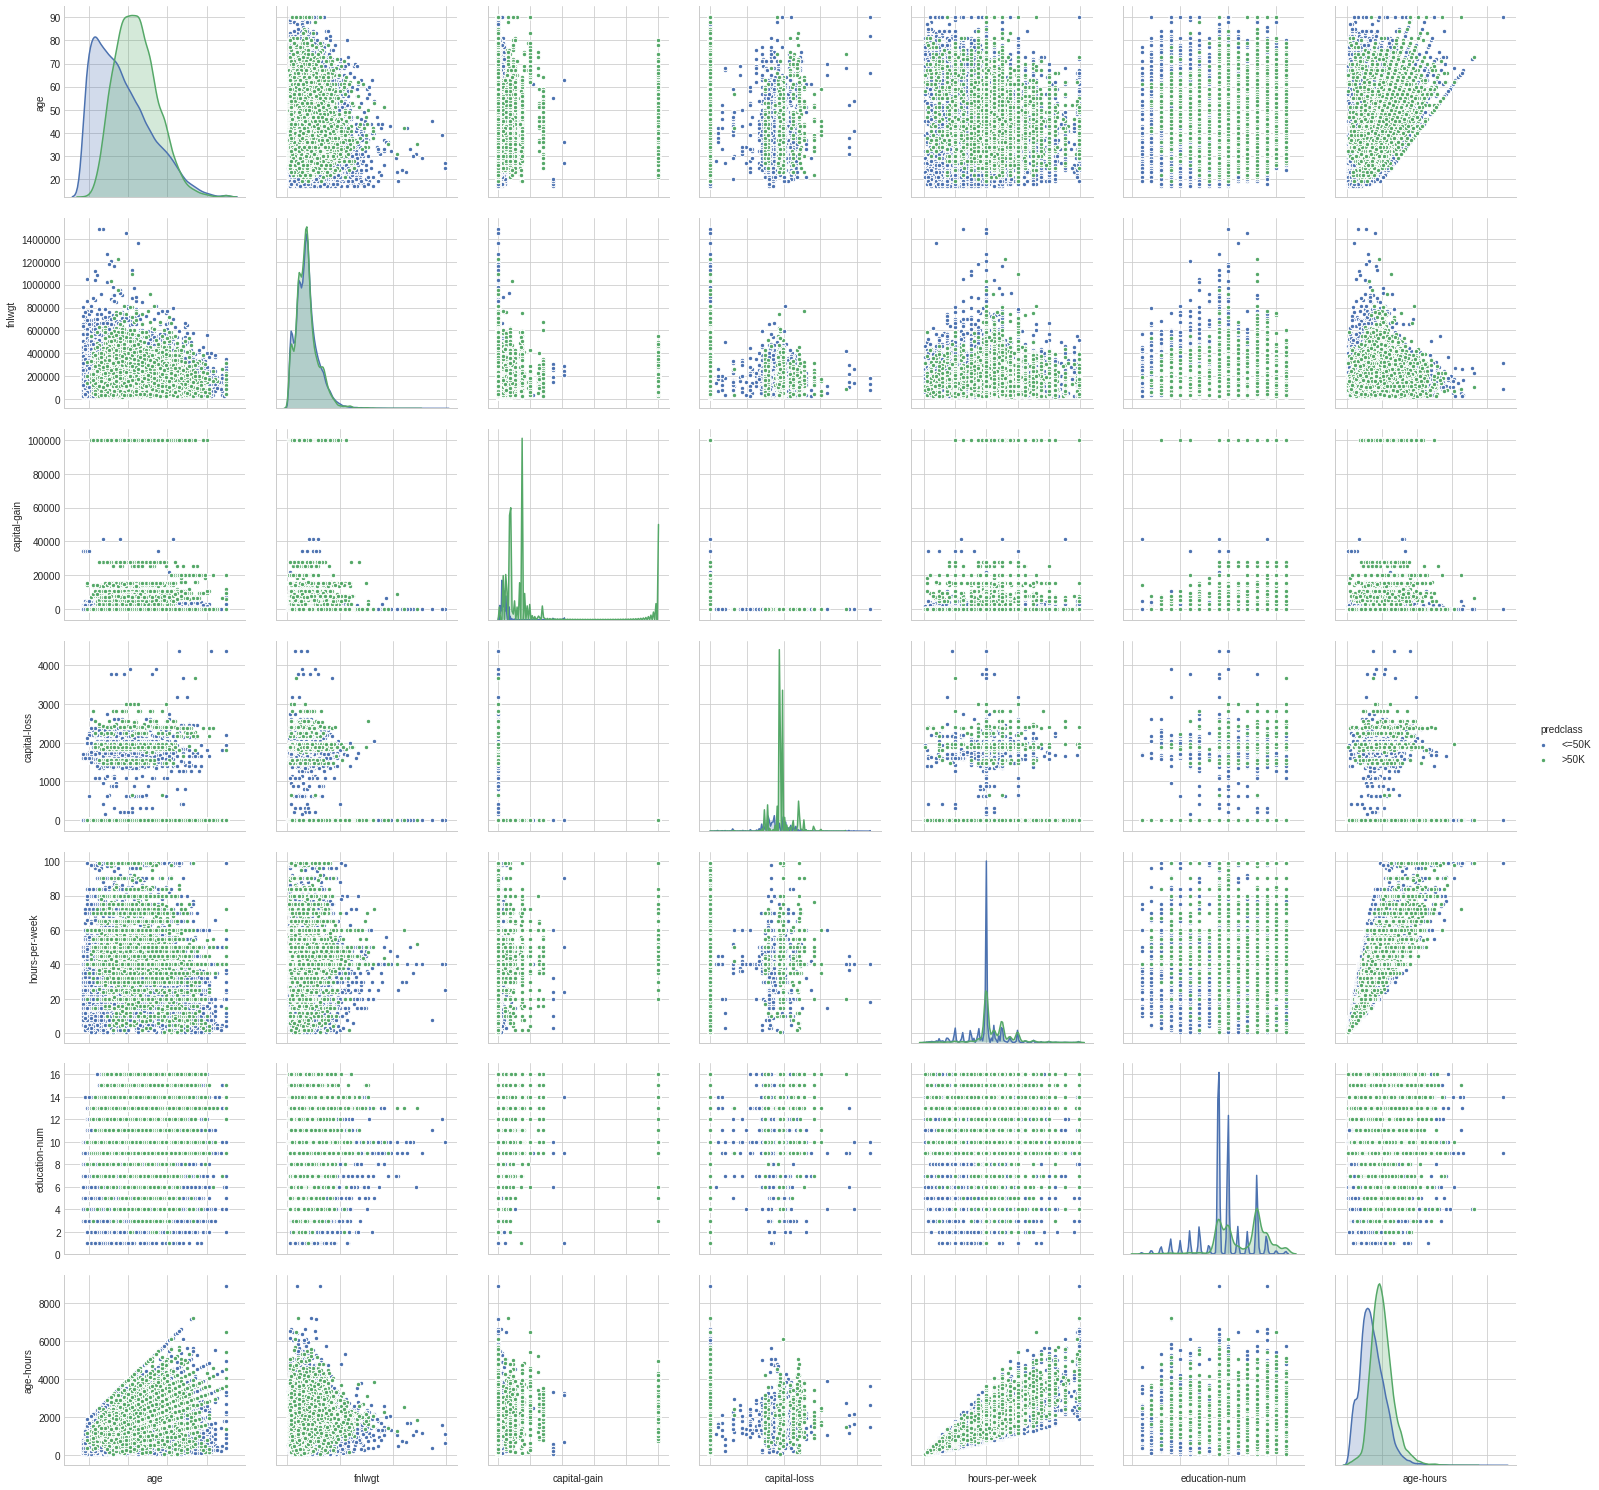

In [34]:
pp = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True),
                  plot_kws=dict(s=20) )
pp.set(xticklabels=[])


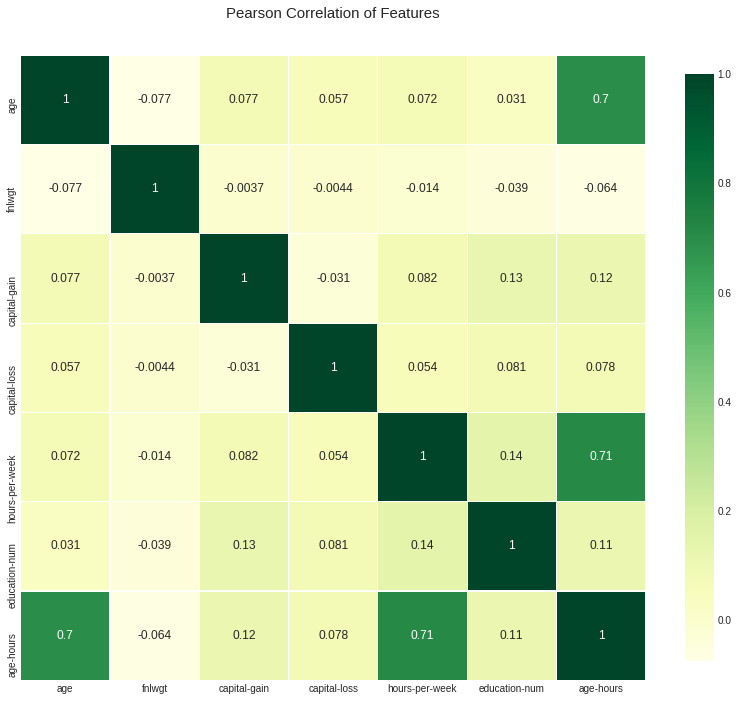

In [35]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)

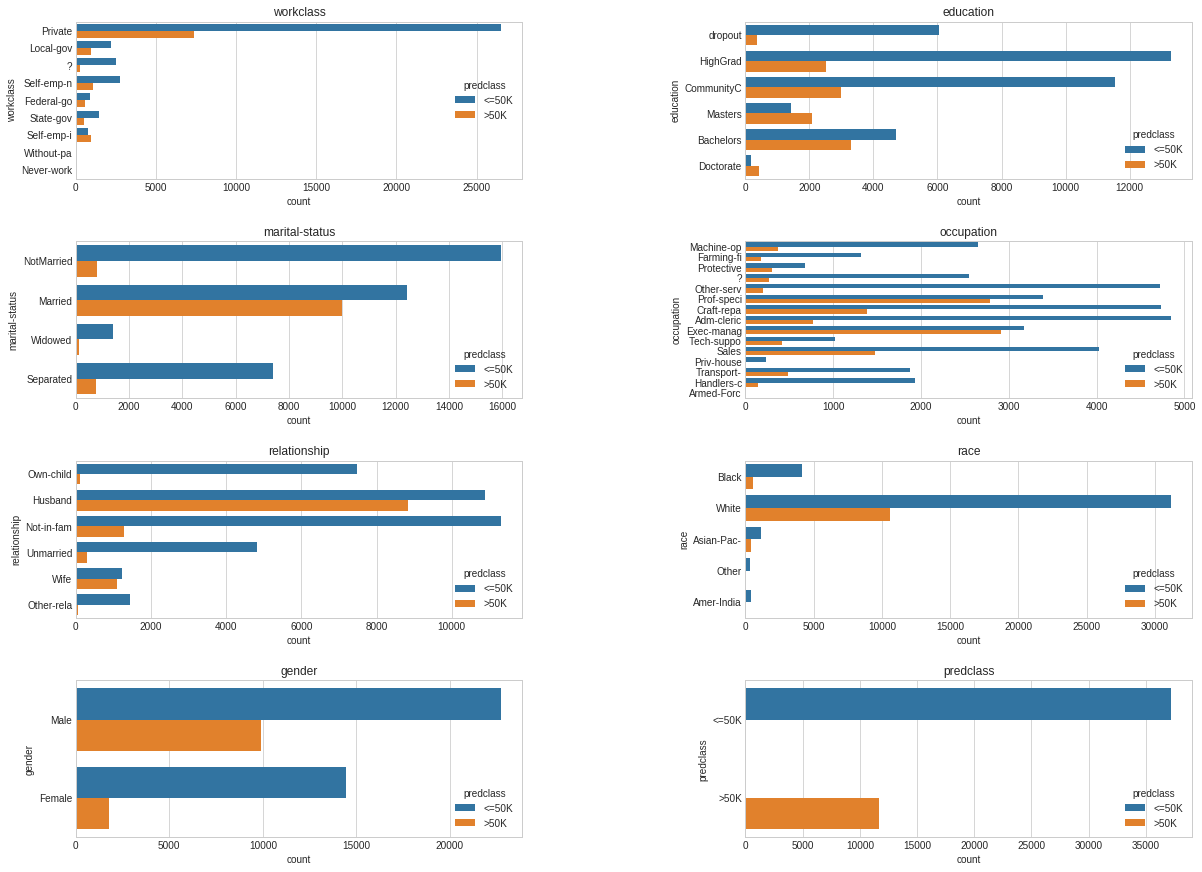

In [36]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2,
                       wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                        wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

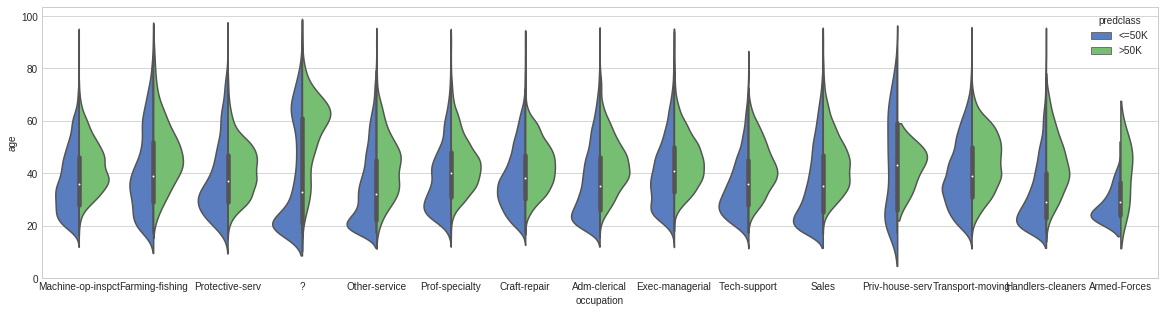

In [37]:
 from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted",
                    split=True, saturation=0.75)
ax

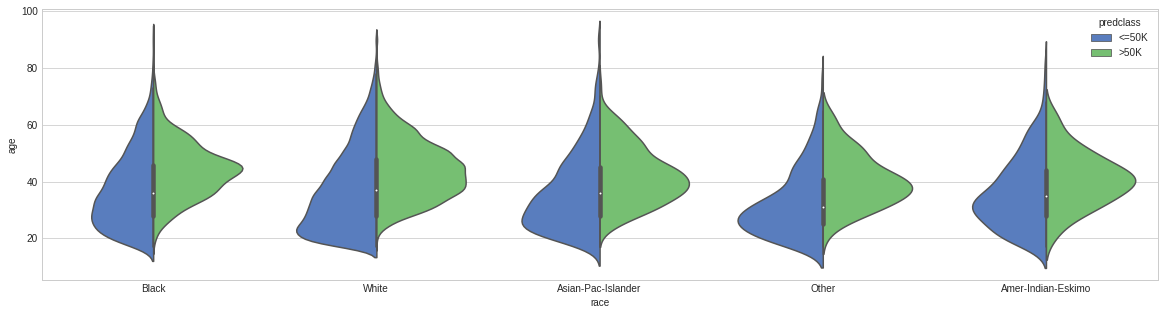

In [38]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [39]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

In [40]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [41]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,education-num,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,8,4,19329,5,1,7,3,2,1,0,0,39,39,0,6,2,3,478,1
1,21,4,4212,3,0,5,0,4,1,0,0,49,39,0,8,5,4,818,2
2,11,2,25340,1,0,11,0,4,1,0,0,39,39,1,11,3,3,530,1
3,27,4,11201,1,0,7,0,2,1,98,0,39,39,1,9,7,3,766,1
4,1,0,5411,1,1,0,3,4,0,0,0,29,39,0,9,0,2,285,0


In [42]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,education-num,age-hours
0,8,4,19329,1,7,3,2,1,0,0,39,6,478
1,21,4,4212,0,5,0,4,1,0,0,49,8,818
2,11,2,25340,0,11,0,4,1,0,0,39,11,530
3,27,4,11201,0,7,0,2,1,98,0,39,9,766
4,1,0,5411,1,0,3,4,0,0,0,29,9,285


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler



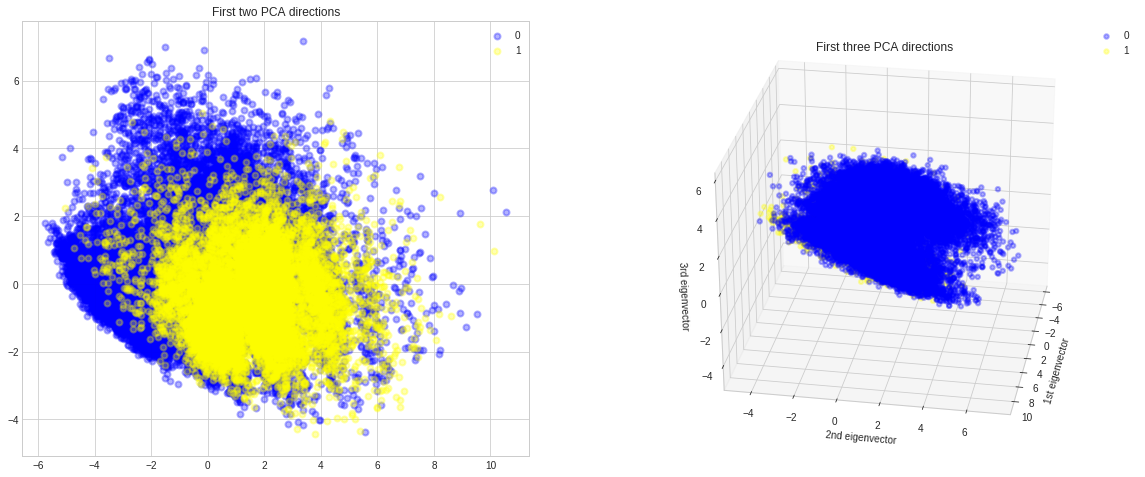

In [45]:
std_scale = preprocessing.StandardScaler().fit(my_df.drop('predclass', axis=1))
X = std_scale.transform(my_df.drop('predclass', axis=1))
y = my_df['predclass']

target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3

plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [46]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running


array([0.21396606, 0.32900641, 0.42619426, 0.5087123 , 0.5886566 ,
       0.66655697, 0.74117332, 0.81015145, 0.87025797, 0.92510506,
       0.96812167, 0.99800627, 1.        ])

In [47]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

/home/akash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [49]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.7429624321834374

In [50]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

/home/akash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/akash/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/akash/anaconda3/lib/python3.6/site-p

0.7915311446251154

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8213737332377931


In [52]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.7651755553280786


In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)


The accuracy of the Logistic Regression is 0.8252635889036749


In [55]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8502405568635479


In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)


The accuracy of the KNN Model is 0.758010031733033


In [57]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

,CV Mean,Std
Naive Bayes,0.807215,0.004966
Linear Svm,0.841100,0.003390
Radial Svm,0.852545,0.002821
Logistic Regression,0.840260,0.003839
Decision Tree,0.814913,0.003127
KNN,0.843065,0.004081
Random Forest,0.853753,0.003248
